# Chapter 2: More Image Transformation and Manipulation

## Problems

### 1.1 Rotating an image with scipy.ndimage

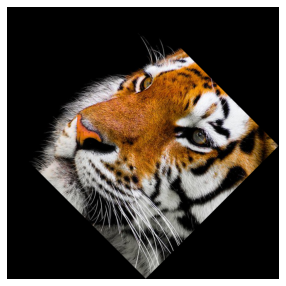

In [6]:
from scipy.ndimage import rotate
from skimage.io import imread
import matplotlib.pylab as plt

im = imread('images/Chapter 02/Figure 2.4.jpg') 
im = rotate(im, -45) 
plt.figure(figsize=(5,5))
plt.imshow(im)
plt.axis('off') # stop showing the axes
plt.show()

## 3. Image Projection with Homography using scikit-image

In [10]:
from skimage.transform import ProjectiveTransform
from skimage.io import imread
import numpy as np
import matplotlib.pylab as plt
from matplotlib.path import Path

im_src = imread('images/Chapter 02/Figure 2.4.jpg')
im_dst = imread('images/Chapter 02/Figure 2.3.jpg')
print(im_src.shape, im_dst.shape)



(480, 500, 3) (321, 450, 3)


In [11]:
pt = ProjectiveTransform()

width, height = im_src.shape[0], im_src.shape[1]
src = np.array([[       0.,       0.],
                [ height-1,       0.],
                [ height-1,  width-1],
                [       0.,  width-1]])
dst = np.array([[  74.,   41.],
                [ 272.,   96.],
                [ 272.,  192.],
                [  72.,  228.]])

pt.estimate(src, dst)

True

In [17]:
width, height = im_dst.shape[0], im_dst.shape[1]

polygon = dst
poly_path = Path(polygon)

x, y = np.mgrid[:height, :width]
coors = np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 

mask = poly_path.contains_points(coors)
mask = mask.reshape(height, width)

In [18]:
dst_indices = np.array([list(x) for x in list(zip(*np.where(mask > 0)))])
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)
src_indices[:,0], src_indices[:,1] = src_indices[:,1], src_indices[:,0].copy()
im_out = np.copy(im_dst)
im_out[dst_indices[:,1], dst_indices[:,0]] = im_src[src_indices[:,0], src_indices[:,1]]
print(src_indices)

[[479   0]
 [242   0]
 [245   0]
 ...
 [469 499]
 [474 499]
 [479 499]]


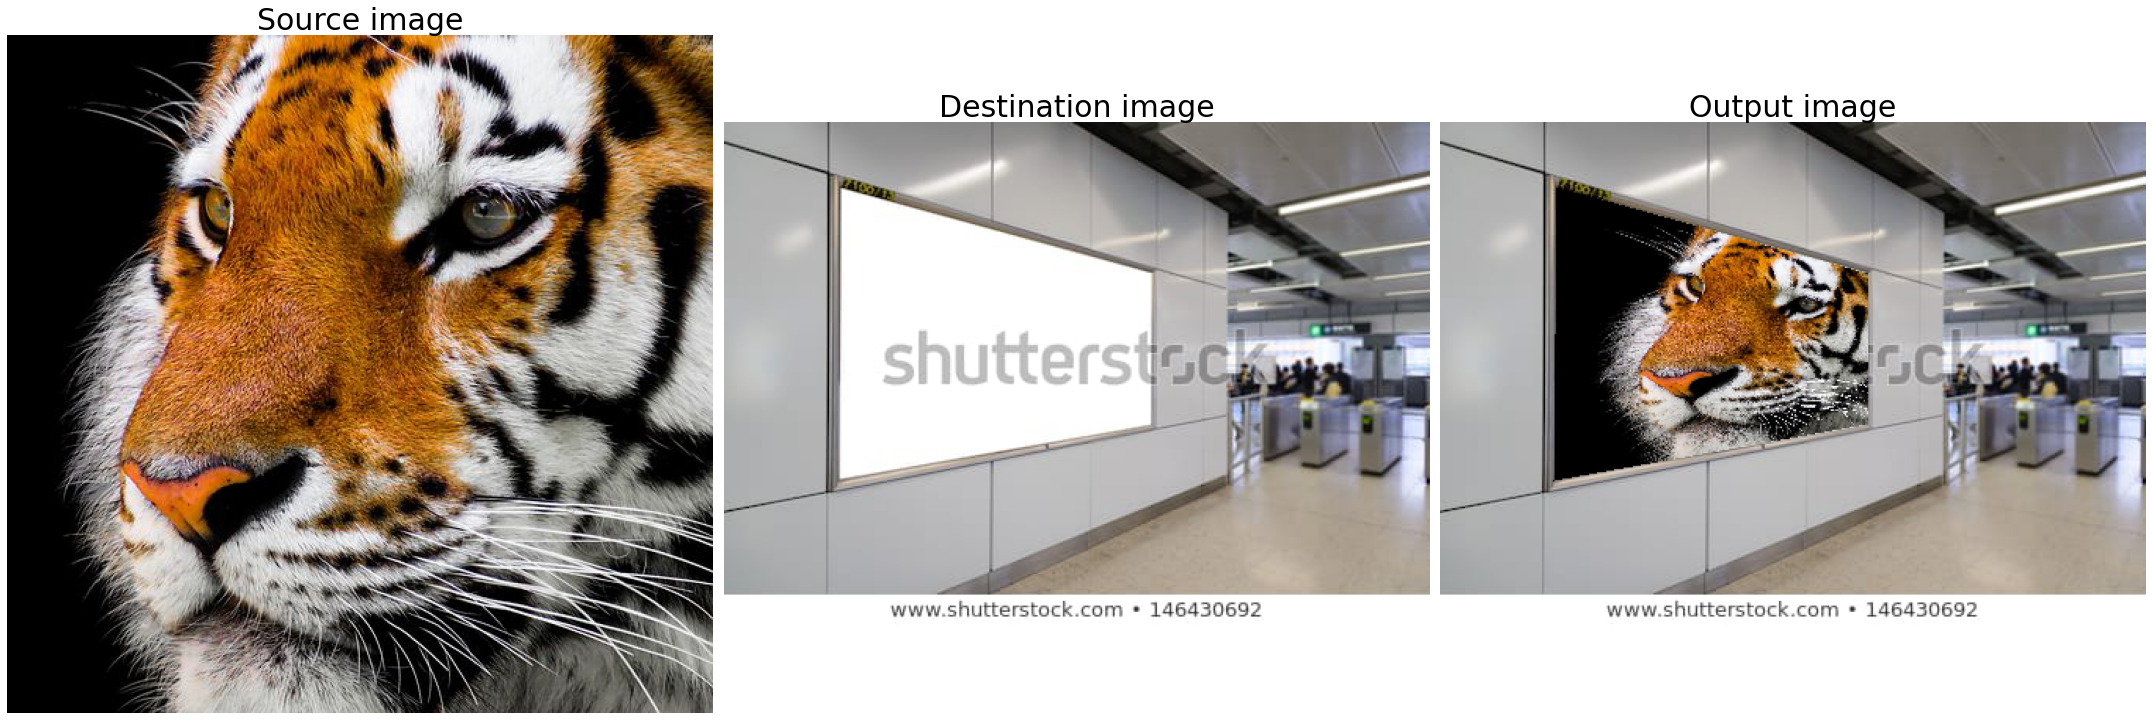

In [14]:
plt.figure(figsize=(30,10))
plt.subplot(131), plt.imshow(im_src, cmap='gray'), plt.axis('off'), plt.title('Source image', size=30)
plt.subplot(132), plt.imshow(im_dst, cmap='gray'), plt.axis('off'), plt.title('Destination image', size=30)
plt.subplot(133), plt.imshow(im_out, cmap='gray'), plt.axis('off'), plt.title('Output image', size=30)
plt.tight_layout()
plt.show()

## 5. Finding Duplicate and Similar Images with Hashing

### 5.1 Using Cryptographic (MD5) Hash functions to find duplicate images with hashlib

In [20]:
import hashlib, os
from glob import glob
import matplotlib.pylab as plt
from skimage.io import imread
from time import time

In [21]:
hex_digest = hashlib.md5(open('images/Chapter 02/Figure 2.1.jpg', 'rb').read()).hexdigest()
bin_digest = format(int(str(hex_digest), 16), "040b")
print('MD5 digest = {} ({})'.format(hex_digest, bin_digest) )
print('length of hex digest = {} bytes'.format(len(hex_digest)))
print('length of bin digest = {} bits'.format(len(bin_digest)))

MD5 digest = 8335f826c77f68640f21bbf9ac784bad (10000011001101011111100000100110110001110111111101101000011001000000111100100001101110111111100110101100011110000100101110101101)
length of hex digest = 32 bytes
length of bin digest = 128 bits


[['images/Chapter 02/Img_02_15.jpg', 'images/Chapter 02/Img_02_29.jpg', 'images/Chapter 02/Img_02_11.jpg'], ['images/Chapter 02/Img_02_13.jpg', 'images/Chapter 02/Img_02_30.jpg']]


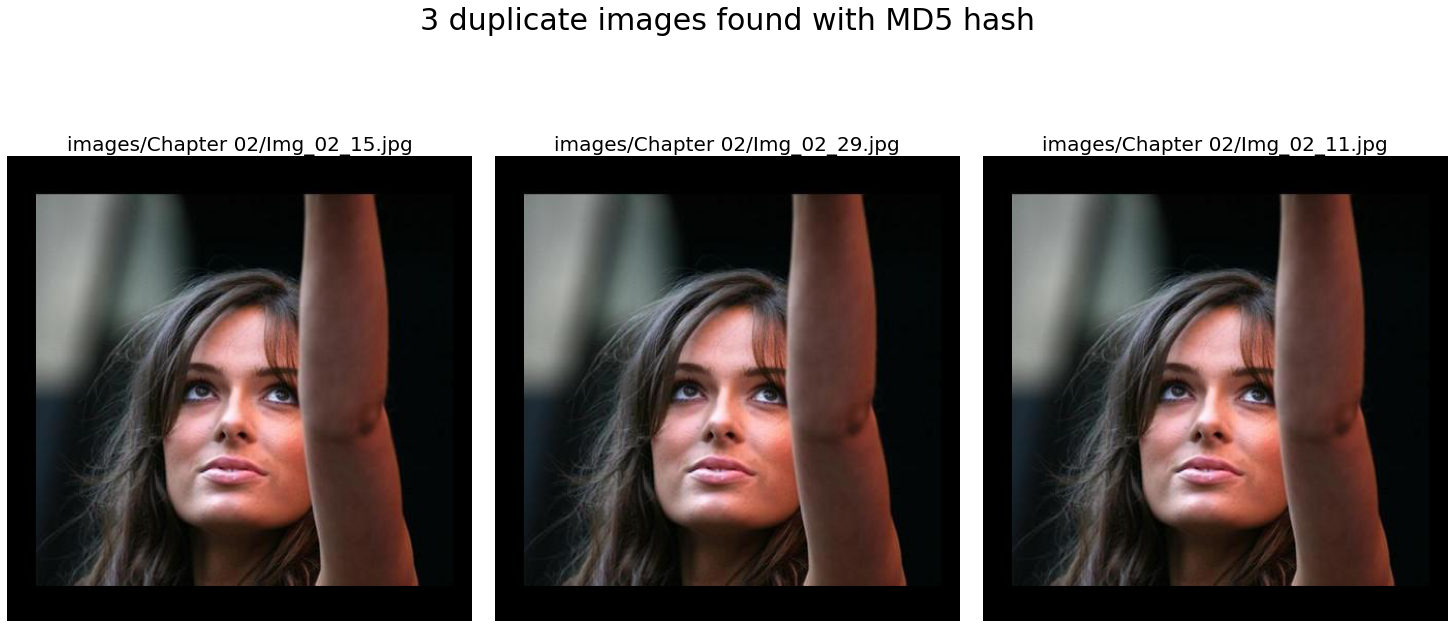

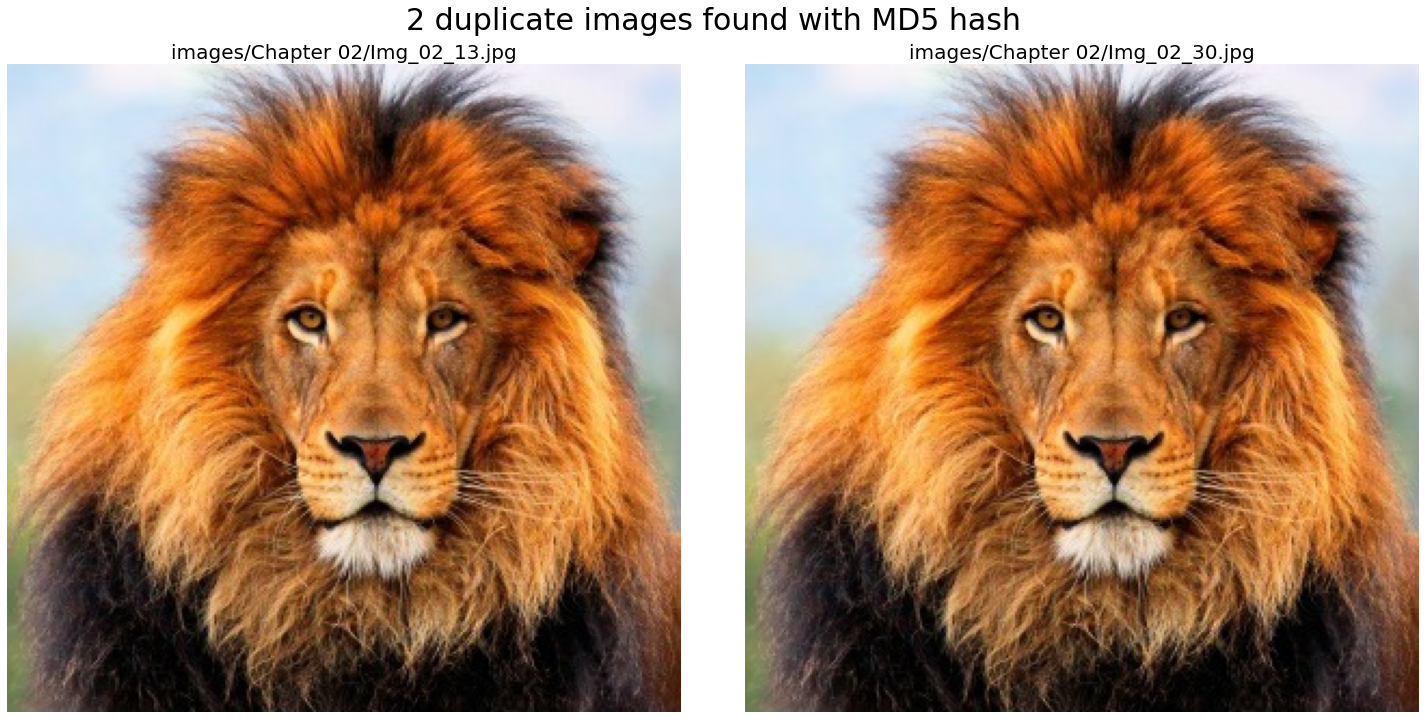

In [22]:


def find_duplicates(dir_name):
    def is_image(file_name):
        f = file_name.lower()
        return f.endswith(".png") or f.endswith(".jpg")
    
    hash_keys = dict()
    for file_name in glob(dir_name): 
        if os.path.isfile(file_name) and is_image(file_name):
            with open(file_name, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
            if file_hash not in hash_keys: 
                hash_keys[file_hash] = [file_name]
            else:
                hash_keys[file_hash].append(file_name)
    return [hash_keys[file_hash] for file_hash in hash_keys if len(hash_keys[file_hash]) > 1]

def show_duplicates(duplicates):
    for duplicated in duplicates:
        try:
            plt.figure(figsize=(20,10))
            plt.subplots_adjust(0,0,1,0.9,0.05,0.05)
            for (i, file_name) in enumerate(duplicated):
                plt.subplot(1, len(duplicated), i+1)
                plt.imshow(imread(file_name))
                plt.title(file_name, size=20)
                plt.axis('off')
            plt.suptitle('{} duplicate images found with MD5 hash'.format(len(duplicated)), size=30)
            plt.show()
        except OSError as e:
            continue

duplicates = find_duplicates('images/Chapter 02/*.*')
print(duplicates)
show_duplicates(duplicates)